# A Study of Attention

## Permutation Equivariance of Attention

We shall prove the permutation equivariance of the attention mechanism by direct calculation. Consider a simple self-attention mechanism, which is a key component of modern transformer architectures. The attention mechanism computes the output by weighting the input vectors based on their relevance to each other.

Let $X \in \mathbb{R}^{n \times d}$ be the input matrix, where $n$ denotes the number of input vectors and $d$ represents the dimensionality of each vector. The attention mechanism calculates the Query ($Q$), Key ($K$), and Value ($V$) matrices as follows:

$$Q = XW_Q, \quad K = XW_K, \quad V = XW_V$$

where $W_Q, W_K, W_V \in \mathbb{R}^{d \times d'}$ are learnable weight matrices. The attention weights are computed using a scaled dot-product attention:

$$A = \operatorname{softmax} \left(\frac{QK^T}{\sqrt{d'}}\right)$$

The output matrix $Y \in \mathbb{R}^{n \times d}$ is then obtained by:

$$Y = AV$$

Now, let $\pi$ be a permutation of the set ${1, 2, \ldots, n}$. We will show that the attention mechanism is equivariant with respect to this permutation. Define the permutation matrix $P_\pi \in \mathbb{R}^{n \times n}$ such that $(P_\pi){ij} = 1$ if $j = \pi(i)$ and $(P\pi){ij} = 0$ otherwise. Applying the permutation to the input matrix $X$ results in $X\pi = P_\pi X$.

Next, calculate the Query, Key, and Value matrices for the permuted input:

$$Q_\pi = X_\pi W_Q = P_\pi XW_Q = P_\pi Q$$
$$K_\pi = X_\pi W_K = P_\pi XW_K = P_\pi K$$
$$V_\pi = X_\pi W_V = P_\pi XW_V = P_\pi V$$

Now, compute the attention weights for the permuted input:

$$A_\pi = \operatorname{softmax} \left(\frac{Q_\pi K_\pi^T}{\sqrt{d'}}\right) = \operatorname{softmax} \left(\frac{P_\pi Q (P_\pi K)^T}{\sqrt{d'}}\right) = \operatorname{softmax} \left(\frac{P_\pi Q K^T P_\pi^T}{\sqrt{d'}}\right) = P_\pi A P_\pi^T$$

Finally, calculate the output for the permuted input:

$$Y_\pi = A_\pi V_\pi = P_\pi A P_\pi^T (P_\pi V) = P_\pi (AV) = P_\pi Y$$

Thus, we have shown that the attention mechanism is permutation equivariant, as the output for the permuted input is the same as the permuted output:

$$Y_\pi = P_\pi Y$$

In conclusion, we have proven the permutation equivariance of the attention mechanism by direct calculation. This property demonstrates the robustness of the attention mechanism to the order of the input vectors, which is beneficial in various applications, such as natural language processing and graph neural networks.

### Description of the Action on the Adjacency Matrix

When acting on a weighted adjacency matrix by conjugating it with permutation matrices, the structure of the associated graph is preserved, although the order of vertices is altered. Let us examine this effect in detail.

Consider a graph $G = (V, E)$, where $V$ is the set of vertices and $E$ is the set of edges. Let $A \in \mathbb{R}^{n \times n}$ be the weighted adjacency matrix of $G$, where $n = |V|$. The $(i, j)$-th entry of $A$, denoted by $A_{ij}$, represents the weight of the edge connecting vertex $i$ and vertex $j$. If there is no edge between vertices $i$ and $j$, $A_{ij} = 0$.

Now, let $\pi$ be a permutation of the set ${1, 2, \ldots, n}$. Define the permutation matrix $P_\pi \in \mathbb{R}^{n \times n}$ such that $(P_\pi){ij} = 1$ if $j = \pi(i)$ and $(P\pi){ij} = 0$ otherwise. Conjugating the weighted adjacency matrix $A$ by the permutation matrix $P\pi$ yields a new weighted adjacency matrix $A_\pi$:

$$A_\pi = P_\pi A P_\pi^T$$

The effect of this conjugation on the weighted adjacency matrix and the associated graph can be analyzed as follows:

Vertex reordering: The conjugation by the permutation matrix effectively reorders the vertices of the graph according to the permutation $\pi$. The new adjacency matrix $A_\pi$ represents the same graph as the original adjacency matrix $A$, but with the vertices renumbered according to $\pi$.

Edge weights preservation: The edge weights in the graph are preserved under conjugation. Specifically, if there is an edge between vertices $i$ and $j$ with weight $A_{ij}$ in the original graph, then there is an edge between the permuted vertices $\pi(i)$ and $\pi(j)$ with the same weight in the permuted graph, i.e., $A_\pi(\pi(i), \pi(j)) = A_{ij}$.

### Permutation Equivariance of Multihead Attention 

Suppose $PX$ was given as input, where $P$ is a permutation matrix. 

First note that for each attention head, 

$$(PXW^i_K)(PXW^i_Q)^T = P(XW_K^i)(XW^i_Q)^TP^T.$$ 

After the softmax operation, we again get 

$$\sigma[P(XW_K^i)(XW^i_Q)^TP^T] = P\sigma[(XW_K^i)(XW^i_Q)^T]P^T.$$ 

Next, we have, 

$$\text{Attn}(PX) = PX + \sum_{i=1}^h P\sigma[(W^i_KX)^T(W^i_QX)]P \cdot (PXW^i_V)W^i_O  = \text{Attn}(X)P,$$ 

where we used $P^TP = I$. Permutation equivariance of the token-wise feed-forward layer can be shown similarly: 

\begin{align}
\text{FF}(XP) &= \text{Attn}(X)P +W_2\cdot\text{ReLU}(W_1\cdot\text{Attn}(X)P +b_{1,n}1^TP)+b_{2,n}1^TP \\  
               & =\text{Attn}(X)P +W_2\cdot\text{ReLU}(W_1\cdot\text{Attn}(X)+b_{1,n}1^T)P +b_{2,n}1^TP \\
               &= \text{FF}(X)P
\end{align}                

where $\text{ReLU}(XP) = \text{ReLU}(X)P$ was used. This analysis shows that the function class $T_{h,m,r}(\cdot)$ is restricted to permutation equivariant functions. $\blacksquare$

### Group Equivariance in General

See other notebook.

### Questions:

1. In [Are Transformers universal approximators of sequence-to-sequence functions?](https://arxiv.org/abs/1912.10077) it states "Moreover, Transformers have to *rely solely on the pairwise dot-products* to capture interaction between the input tokens." Is this necessarily true? Could we modify the dot product to be a bilinear form given by some learned matrix A, so that $$\text{score}(x_i, x_j) = \frac{q_i^TAk_j}{\sqrt{d}}.$$ This is done in some texts. Moreover, does entanglement offer some way of understanding this better or modelling correlations that can't be modelled by the attention mechanism as is?
2. [The general theory of permutation equivarant neural networks and higher order graph variational encoders
](https://arxiv.org/abs/2004.03990) does not provide enough details on the equivariance of the feed-forward linear layers of transformers, especially at the level of the representation theory and combinatorics of the symmetric group $S_n$ acting on tokens (or the nodes of the attention graph). Can we write up more of the details and examples so that this is more accessible to a wider audience? 
3. What other group equivariance in language can we find? See for example [On the Generalization of Equivariance and Convolution in Neural Networks to the Action of Compact Groups
](https://arxiv.org/abs/1802.03690) [A General Theory of Equivariant CNNs on Homogeneous Spaces
](https://arxiv.org/abs/1811.02017). What does it say about a language or text if a neural network with a given equivariance is highly effective or inneffective at modelling that language?
4. How can this be made compatible with transformers? See for example [Group Equivariant Stand-Alone Self-Attention For Vision
](https://arxiv.org/abs/2010.00977).
5. When do we need equivariance? What problems benefit from it? See for example [Geometric Deep Learning: Grids, Groups, Graphs, Geodesics, and Gauges
](https://arxiv.org/abs/2104.13478)
6. How can Group Equivariant Neural Networks be used for NLP? 
7. Are there symmetries in language that we are missing? Invariant theory applications?
8. Is this related to graph grammars and/or the topology of language? See for example [Graph Grammars - http:/ /www.its.caltech.edu](http://www.its.caltech.edu/~matilde/GraphGrammarsLing.pdf)
9. Can we apply [The Quantum Graph Recurrent Neural Network](https://pennylane.ai/qml/demos/tutorial_qgrnn.html) to understand weighted attention graphs, and is this connected to Question 6?
10. How can we understand this through viewing transformers as ["graph attention networks"](https://docs.dgl.ai/en/0.8.x/tutorials/models/4_old_wines/7_transformer.html)?


## Information Theory and Attention

### Probability Distributions from Attention

$$ 
P(X_i) = \left( \text{softmax}_j\left(\frac{\langle q_i, k_j \rangle}{\sqrt{d}}\right) \right)_{j=1}^n = \left( \frac{e^{\frac{\langle q_i, k_j \rangle }{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \right)_{j=1}^n 
$$

### Shannon Entropy
Given the probability distribution $P(X_i)$ for token $X_i$, the Shannon entropy $H(X_i)$ measures the average uncertainty or randomness associated with the attending behavior of token $X_i$. The formula for the Shannon entropy is as follows:

$$
H(X_i) = -\sum_{j=1}^n P(X_i)_j \log_2 P(X_i)_j = -\sum_{j=1}^n \frac{e^{\frac{\langle q_i, k_j \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \log_2 \left( \frac{e^{\frac{\langle q_i, k_j \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \right)
$$

### KL-Divergence
To measure the dissimilarity between the attending behaviors of tokens $X_i$ and $X_j$, we can compute the Kullback-Leibler (KL) divergence, denoted as $D_{KL}(X_i, X_j)$. The formula for KL divergence is:

$$
D_{KL}(X_i, X_j) = \sum_{k=1}^n P(X_i)_k \log_2 \frac{P(X_i)_k}{P(X_j)_k} = \sum_{k=1}^n \frac{e^{\frac{\langle q_i, k_k \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \log_2 \left( \frac{\frac{e^{\frac{\langle q_i, k_k \rangle}{\sqrt{d}}}}{\sum{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}}}{\frac{e^{\frac{\langle q_j, k_k \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_j, k_l \rangle}{\sqrt{d}}}}} \right)
$$



### Joint Distributions and Joint Entropy
Using the distributions, 

$$P(X_i) = \left( \frac{ \exp\left(\frac{q_i k_1^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_i k_k^T}{\sqrt{d}}\right) }, \frac{ \exp\left(\frac{q_i k_2^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_i k_k^T}{\sqrt{d}}\right) }, \cdots , \frac{ \exp\left(\frac{q_i k_n^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_i k_k^T}{\sqrt{d}}\right) }\right)$$

we can compute the joint distribution if we assume the two are independent (this is likely not true, and we'll investigate what happens when it isn't later on):

$$
P(X_i, X_j) \substack{= \\ ?}P(X_i) \otimes P(X_j) = \begin{bmatrix}
\frac{ \exp\left(\frac{q_i k_1^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_i k_k^T}{\sqrt{d}}\right) } \cdot \frac{ \exp\left(\frac{q_j k_1^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_j k_k^T}{\sqrt{d}}\right) } & \cdots & \frac{ \exp\left(\frac{q_i k_1^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_i k_k^T}{\sqrt{d}}\right) } \cdot \frac{ \exp\left(\frac{q_j k_n^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_j k_k^T}{\sqrt{d}}\right) } \\
\vdots & \ddots & \vdots \\
\frac{ \exp\left(\frac{q_i k_n^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_i k_k^T}{\sqrt{d}}\right) } \cdot \frac{ \exp\left(\frac{q_j k_1^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_j k_k^T}{\sqrt{d}}\right) } & \cdots & \frac{ \exp\left(\frac{q_i k_n^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_i k_k^T}{\sqrt{d}}\right) } \cdot \frac{ \exp\left(\frac{q_j k_n^T}{\sqrt{d}}\right) }{\sum_k \exp\left( \frac{q_j k_k^T}{\sqrt{d}}\right) }
\end{bmatrix}
$$

The matrix $P(X_i) \otimes P(X_j)$ represents the joint probability distribution of tokens $X_i$ and $X_j$ attending to all other tokens in the input sequence under the assumption that $P(X_i)$ and $P(X_j)$ are independent. Each entry in this matrix corresponds to the joint probability of token $X_i$ attending to token $k_i$ and token $X_j$ attending to token $k_j$. Some properties of $P(X_i) \otimes P(X_j)$ are:

1. Each entry is non-negative: $(P(X_i) \otimes P(X_j))_{k_i, k_j} \geq 0$ for all $k_i, k_j$.
2. The sum of all entries in the matrix equals 1: $\sum_{k_i, k_j} (P(X_i) \otimes P(X_j))_{k_i, k_j} = 1$.
3. Given the assumption that $P(X_i, X_j) = P(X_i) \otimes P(X_j)$, we can compute the joint entropy $H(X_i, X_j)$ using the following formula:

$$
H(X_i, X_j) = \sum_{k_i=1}^n \sum_{k_j = 1}^n (P(X_i) \otimes P(X_j)_{k_i, k_j} \log_2(P(X_i) \otimes P(X_j)_{k_i, k_j}
$$

$$
= -\sum_{k_i=1}^n \sum_{k_j=1}^n \frac{ \exp\left(\frac{q_i k_{k_i}^T}{\sqrt{d}}\right) }{\sum_{l=1}^n \exp\left( \frac{q_i k_l^T}{\sqrt{d}}\right) } \cdot \frac{ \exp\left(\frac{q_j k_{k_j}^T}{\sqrt{d}}\right) }{\sum_{l=1}^n \exp\left( \frac{q_j k_l^T}{\sqrt{d}}\right) } \log_2 \left( \frac{ \exp\left(\frac{q_i k_{k_i}^T}{\sqrt{d}}\right) }{\sum_{l=1}^n \exp\left( \frac{q_i k_l^T}{\sqrt{d}}\right) } \cdot \frac{ \exp\left(\frac{q_j k_{k_j}^T}{\sqrt{d}}\right) }{\sum_{l=1}^n \exp\left( \frac{q_j k_l^T}{\sqrt{d}}\right) } \right)
$$

### Mutual Information

$$
I(X_i, X_j) = \sum_{x_i, x_j}P(X_i, X_j) \log_2\left( \frac{P(X_i, X_j)}{P(X_i)P(X_j)} \right)
$$
satisfies the following properties:

1. Non-negative: The mutual information is always non-negative, i.e., $I(X;Y) \geq 0$.

2. Symmetric: The mutual information is symmetric under the interchange of $X$ and $Y$, i.e., $I(X;Y) = I(Y;X)$.

3. Zero if and only if independent: The mutual information is zero if and only if the two variables are independent, i.e., $P(X,Y) = P(X)P(Y)$.

So for each $P(X_i, X_j) = P(X_i) \otimes P(X_j)$ we have $I(X_i, X_j) = 0$. This will not be the case for graph states. We also note we have the following identity, 

$$
I(X_i, X_j) = H(x_i)+H(x_j)-H(x_i, x_j).
$$

We will discuss later how to generalize these ideas to the setting, where we can calculate von Neumann enatnglement entropy $S(\rho_{X_i, X_j})$ and $S(\rho_{X_i})$ (as apposed to joint entropy and Shannon entropy), and quantum mutual information $QMI(X_i, X_j) = S(\rho_{X_i}) + S(\rho_{X_j}) - S(\rho_{X_i, X_j})$. We can define a distance metric using inverse quantum mutual information, and when the system is entangled we get nontrivial quantum mutual information. 

## Persistent Homology of Attention Graphs

### What is Persistent Homology

Persistent homology is a way of studying topological features of data at mutliple scales. It uses a mechanism similar to DB-scan, where the radius of the density based scan is a parameter that typically varies over some range of radii $[0, R]$. 

### Comparing Persistence Diagrams

There are at least three common ways to compare persistence diagrams

- Bottleneck Distance

- Wasserstein Distance

- Interleaving Distance

### Comparing Persistent Homology of Translated Texts

We would like to take persistence diagram of the weighted attention graph of a text in one language, and compare it to the persistence diagram of the weighted attention graph of the text translated into another language. What topological features of language might we find that either remain invariant after translating into another language, or change in a principled way?  

## Graph Grammars

Can we extract graph grammars from this? In particular, can we threshold attention graphs using persistent homology as a heuristic, and find subgraphs of the weighted attention graphs that encode graph grammars, similar to the graph grammars mentioned in [Graph Grammars, Insertion Lie Algebras, and Quantum Field Theory
](https://arxiv.org/abs/1502.07796). The idea would be to treat attention in a similar way as the inverse quantum mutual information is treated in [Persistent homology of quantum entanglement
](https://arxiv.org/abs/2110.10214).

## Extracting the Attention Graphs from GPT-2 (English)

In [1]:
pip install transformers -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer, GPT2Model


def plot_attention_graph(layer: int, head: int):
    # Set up the GPT-2 model and tokenizer
    model_name = 'gpt2'
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2Model.from_pretrained(model_name, output_attentions=True)

    # Define the input text
    input_text = "Quantum Information Theory provides ways to study attention using entanglement."

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Convert the attention weights to a weighted adjacency matrix and create a directed graph
    graph = nx.DiGraph()
    sequence_length = attention_weights.shape[0]
    for i in range(sequence_length):
        for j in range(sequence_length):
            graph.add_edge(i, j, weight=attention_weights[i][j])

    # Plot the graph with edge and node labels
    plt.figure(figsize=(10, 10))
    pos = nx.circular_layout(graph)
    nx.draw_networkx_edges(graph, pos, width=2, edge_color='grey')
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12)
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=2000)
    node_labels = {i: tokenizer.decode([input_ids[0][i].item()]) for i in range(sequence_length)}
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=12)
    plt.title(f"Layer {layer} Head {head}")
    plt.axis('off')
    plt.show()

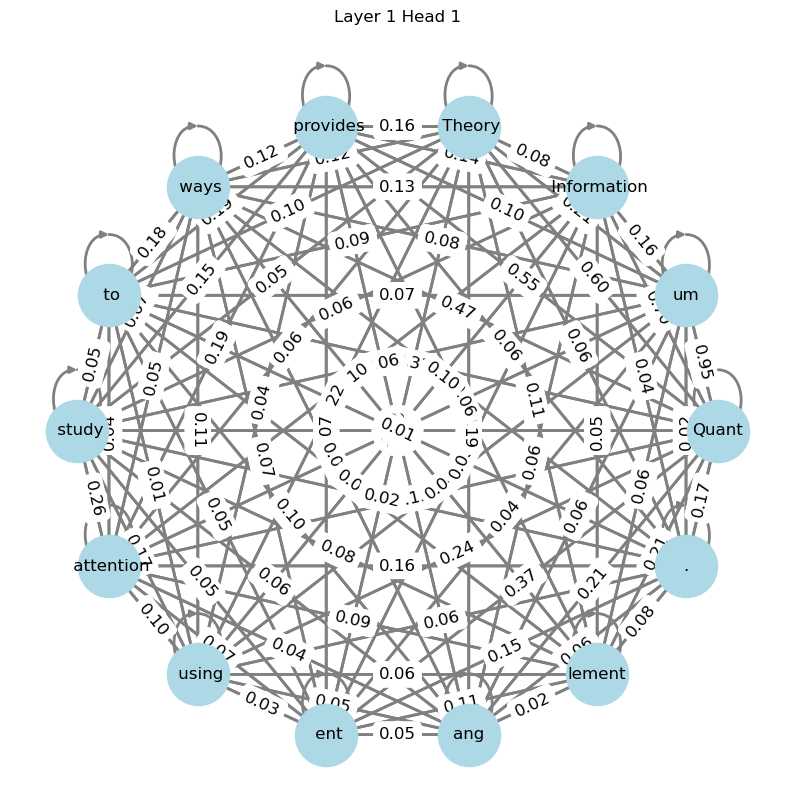

In [3]:
# Example usage:
plot_attention_graph(1, 1)

## Extracting the Attention Graphs from GPT-2 (יידיש)

In [4]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from transformers import XLMRobertaTokenizer, XLMRobertaModel


def plot_attention_graph(layer: int, head: int):
    # Set up the XLM-RoBERTa model and tokenizer
    model_name = 'xlm-roberta-base'
    tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)
    model = XLMRobertaModel.from_pretrained(model_name, output_attentions=True)

    # Define the input text in Yiddish (Hebrew script)
    input_text = "קוואַנטן אינפֿאָרמאַציע טעאָריע גיט וועגן צו פֿאָרשן אויפֿמערקזאַם מיט פֿאַרשלינגן."

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Convert the attention weights to a weighted adjacency matrix and create a directed graph
    graph = nx.DiGraph()
    sequence_length = attention_weights.shape[0]
    for i in range(sequence_length):
        for j in range(sequence_length):
            graph.add_edge(i, j, weight=attention_weights[i][j])

    # Plot the graph with edge and node labels
    plt.figure(figsize=(10, 10))
    pos = nx.circular_layout(graph)
    nx.draw_networkx_edges(graph, pos, width=2, edge_color='grey')
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12)
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=2000)
    node_labels = {i: tokenizer.decode([input_ids[0][i].item()]) for i in range(sequence_length)}
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=12)
    plt.title(f"Layer {layer} Head {head}")
    plt.axis('off')
    plt.show()

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


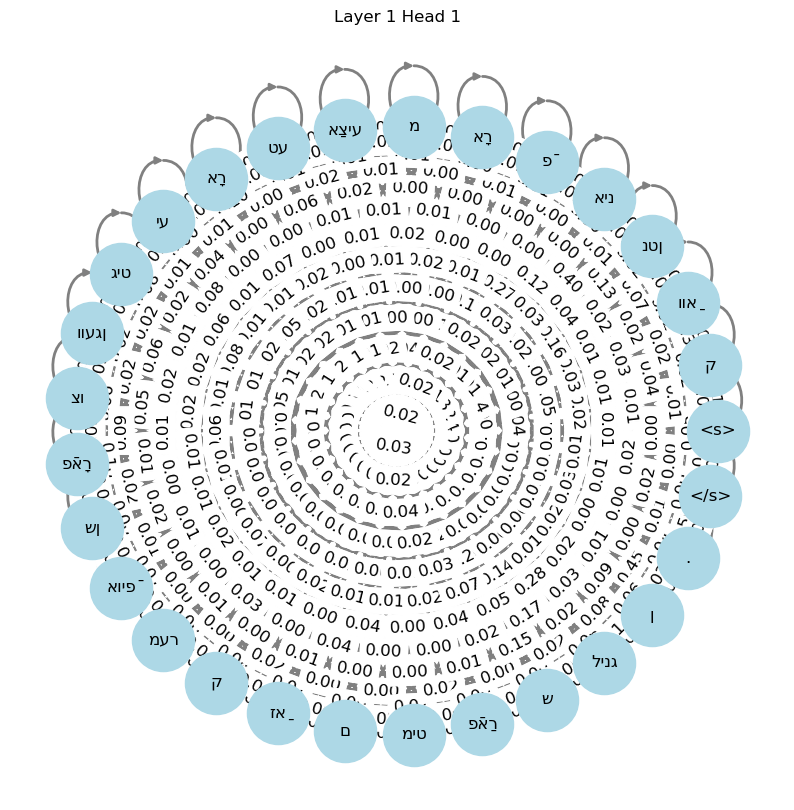

In [5]:
# Example usage:
plot_attention_graph(1, 1)

## Computing Bottleneck Distance of Persistence Diagrams

Note, this is just using random data, not the actual weighted graphs. We need to turn weighted adjacency matrix into a distance matrix between nodes first, then we can run persistent homology on the distance matrix. We can do this in a couple of different ways. One I am fond of is turning the problem into a quantum information theory problem using quantum embeddings and inverse quantum mutual information. 

In [6]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt

def compute_bottleneck_distance(n):
    # Generate two random distance matrices of size n
    D1 = np.random.rand(n, n)
    D2 = np.random.rand(n, n)

    # Compute the persistent homology barcodes for each matrix
    rips1 = gudhi.RipsComplex(distance_matrix=D1)
    st1 = rips1.create_simplex_tree(max_dimension=2)
    diag1 = st1.persistence()
    rips2 = gudhi.RipsComplex(distance_matrix=D2)
    st2 = rips2.create_simplex_tree(max_dimension=2)
    diag2 = st2.persistence()

    # Plot the barcodes
    gudhi.plot_persistence_barcode(diag1)
    plt.title("Barcode for Distance Matrix 1")
    plt.show()
    gudhi.plot_persistence_barcode(diag2)
    plt.title("Barcode for Distance Matrix 2")
    plt.show()

    # Convert the persistence diagrams to NumPy arrays
    diag1 = np.array([[float(birth), float(death)] for _, (birth, death) in diag1])
    diag2 = np.array([[float(birth), float(death)] for _, (birth, death) in diag2])

    # Compute the bottleneck distance between the barcodes
    return gudhi.bottleneck_distance(diag1, diag2)

usetex mode requires TeX.


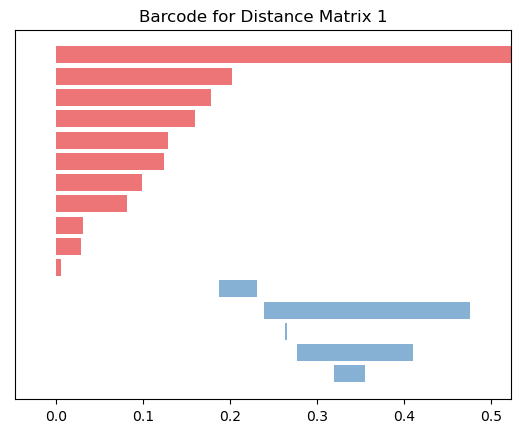

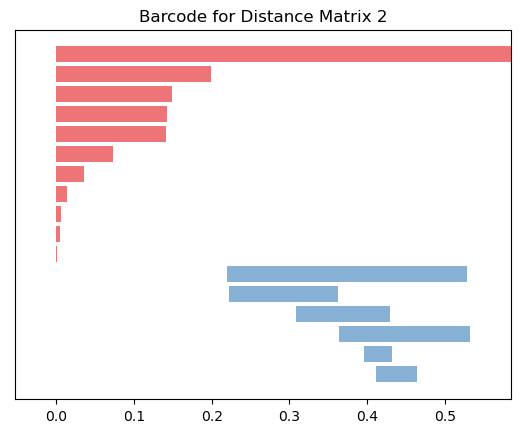

0.08418739242706835

In [7]:
compute_bottleneck_distance(11)

In [8]:
import numpy as np
import persim

# Generate two random persistence diagrams
dgm1 = np.random.rand(10, 2)
dgm2 = np.random.rand(12, 2)

# Compute the bottleneck distance between the diagrams
bottleneck_dist = persim.bottleneck(dgm1, dgm2)

# Compute the Wasserstein distance between the diagrams
wasserstein_dist = persim.sliced_wasserstein(dgm1, dgm2)

print('Bottleneck distance between the diagrams:', bottleneck_dist)
print('Wasserstein distance between the diagrams:', wasserstein_dist)

Bottleneck distance between the diagrams: 0.22967777228945274
Wasserstein distance between the diagrams: 0.9210336630289669


## Computing the "Matrix" of Joint Entropy Values

Here we want to compute the matrix of values 

$$
H(X_i, X_j) = \sum_{k_i=1}^n \sum_{k_j = 1}^n (P(X_i) \otimes P(X_j)_{k_i, k_j} \log_2(P(X_i) \otimes P(X_j)_{k_i, k_j}
$$



In [9]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
from itertools import product

def joint_entropy_matrix(text, layer, head):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2Model.from_pretrained("gpt2", output_attentions=True)
    model.eval()

    tokens = tokenizer.encode(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(tokens)

    attentions = outputs.attentions[layer][:, head, :, :].squeeze()

    d = attentions.size(-1)
    joint_entropy = torch.zeros((d, d))

    for i, j in product(range(d), repeat=2):
        p_i = attentions[i, :]
        p_j = attentions[j, :]
        joint_prob = torch.ger(p_i, p_j)
        joint_entropy[i, j] = -torch.sum(joint_prob * torch.log2(joint_prob + 1e-9))

    return joint_entropy

# Example usage:
text = "Quantum Information Theory provides ways to study attention using entanglement."
layer = 0
head = 0
H = joint_entropy_matrix(text, layer, head)
print(H)


tensor([[-0.0000, 0.2849, 1.1894, 1.5477, 1.8481, 2.2147, 2.5040, 2.4959, 2.9112,
         2.8561, 2.9393, 3.3395, 3.4788, 3.3943],
        [0.2849, 0.5697, 1.4743, 1.8326, 2.1330, 2.4996, 2.7888, 2.7808, 3.1961,
         3.1410, 3.2242, 3.6243, 3.7637, 3.6792],
        [1.1894, 1.4743, 2.3788, 2.7371, 3.0375, 3.4041, 3.6934, 3.6853, 4.1006,
         4.0455, 4.1287, 4.5289, 4.6682, 4.5837],
        [1.5477, 1.8326, 2.7371, 3.0954, 3.3958, 3.7624, 4.0517, 4.0436, 4.4589,
         4.4038, 4.4870, 4.8872, 5.0265, 4.9420],
        [1.8481, 2.1330, 3.0375, 3.3958, 3.6962, 4.0628, 4.3521, 4.3440, 4.7593,
         4.7042, 4.7874, 5.1876, 5.3269, 5.2424],
        [2.2147, 2.4996, 3.4041, 3.7624, 4.0628, 4.4294, 4.7187, 4.7106, 5.1259,
         5.0708, 5.1540, 5.5542, 5.6935, 5.6091],
        [2.5040, 2.7888, 3.6934, 4.0517, 4.3521, 4.7187, 5.0079, 4.9999, 5.4152,
         5.3601, 5.4433, 5.8434, 5.9828, 5.8983],
        [2.4959, 2.7808, 3.6853, 4.0436, 4.3440, 4.7106, 4.9999, 4.9918, 5.4071,
 

In [10]:
import torch
import numpy as np
from transformers import XLMRobertaTokenizer, XLMRobertaModel

def joint_entropy(layer: int, head: int):
    # Set up the XLM-RoBERTa model and tokenizer
    model_name = 'xlm-roberta-base'
    tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)
    model = XLMRobertaModel.from_pretrained(model_name, output_attentions=True)

    # Define the input text in Yiddish (Hebrew script)
    input_text = "קוואַנטן אינפֿאָרמאַציע טעאָריע גיט וועגן צו פֿאָרשן אויפֿמערקזאַם מיט פֿאַרשלינגן."

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Compute the probability distributions P(X_i) \otimes P(X_j)
    softmax_weights = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), -1, attention_weights)
    p_xi_xj = softmax_weights[:, :, None] * softmax_weights[:, None, :]

    # Compute the joint entropy matrix H(X_i, X_j)
    h_xi_xj = -np.sum(p_xi_xj * np.where(p_xi_xj != 0, np.log2(p_xi_xj), 0), axis=(0))

    return h_xi_xj

# Example usage:
layer = 1
head = 1
h_matrix = joint_entropy(layer, head)
print("Matrix dimensions:", h_matrix.shape)
print(h_matrix)


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Matrix dimensions: (29, 29)
[[0.42638457 0.36671355 0.36708876 0.36701176 0.36721832 0.36857697
  0.37245262 0.3678647  0.3756095  0.36817768 0.3731533  0.3691557
  0.37144598 0.3752195  0.36572704 0.37001753 0.36663413 0.37165877
  0.3656801  0.3662033  0.3683563  0.36836702 0.366179   0.3806902
  0.36861938 0.3654028  0.3663765  0.43878078 0.4181133 ]
 [0.36671355 0.32006034 0.32040063 0.32020608 0.32038417 0.32151222
  0.32487816 0.32114404 0.32780272 0.32127732 0.32546923 0.32215607
  0.32418945 0.32748285 0.31904924 0.32279733 0.31986213 0.3241809
  0.3190104  0.31953225 0.32146937 0.3217623  0.31945112 0.3324956
  0.32178086 0.3187217  0.31970617 0.38308793 0.36567816]
 [0.36708876 0.32040063 0.32077277 0.32055533 0.3207435  0.32187164
  0.32525498 0.32151166 0.32817498 0.32162994 0.32584596 0.32250175
  0.3245396  0.32783192 0.31940615 0.32316604 0.32021588 0.3245394
  0.319366   0.31989634 0.32183313 0.32216215 0.3198048  0.332957
  0.32215235 0.31907305 0.3200718  0.38329124 0

## Computing the KL-Divergence

The Kullback-Leibler (KL) divergence, denoted as $D_{KL}(P(X_i)||P(X_j))$, is a measure of how one probability distribution, $P(X_i)$, is different from a second probability distribution, $P(X_j)$. The formula for KL divergence is given by:

$$
D_{KL}(P(X_i)||P(X_j)) = \sum_k P(X_i = k) \log_2 \frac{P(X_i = k)}{P(X_j = k)}
$$

In [11]:
import torch
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model

def pairwise_kl_divergence_gpt2(layer: int, head: int):
    # Set up the GPT-2 model and tokenizer
    model_name = 'gpt2'
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2Model.from_pretrained(model_name, output_attentions=True)

    # Define the input text in English
    input_text = "Quantum Information Theory provides ways to study attention using entanglement."

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Compute the probability distributions P(X_i) using softmax
    softmax_weights = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), -1, attention_weights)

    # Compute the pairwise KL-divergence matrix D_KL(P(X_i)||P(X_j))
    n = softmax_weights.shape[0]
    kl_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            p = softmax_weights[i, :]
            q = softmax_weights[j, :]
            kl_matrix[i, j] = np.sum(p * (np.log2(p + 1e-9) - np.log2(q + 1e-9)))

    return kl_matrix

# Example usage:
layer = 1
head = 1
kl_matrix = pairwise_kl_divergence_gpt2(layer, head)
print("Matrix dimensions:", kl_matrix.shape)
print(kl_matrix)


Matrix dimensions: (14, 14)
[[0.         0.00039827 0.01222907 0.01960542 0.02434653 0.03134005
  0.04848494 0.03427443 0.07781303 0.06014755 0.04200177 0.06383263
  0.06268328 0.0686432 ]
 [0.00039721 0.         0.00844154 0.0145317  0.01913509 0.02534546
  0.04101059 0.02803392 0.06806722 0.05179676 0.03503833 0.05495361
  0.05383159 0.05957519]
 [0.01162895 0.00809721 0.         0.00171489 0.0036082  0.00637985
  0.01556736 0.00864396 0.03213214 0.02317531 0.01239481 0.02351711
  0.02272869 0.02714355]
 [0.01819905 0.01356806 0.00171804 0.         0.00147197 0.0034758
  0.0104451  0.00565427 0.02419616 0.01495834 0.00708822 0.01516836
  0.01522722 0.01975519]
 [0.02208222 0.01758299 0.00360885 0.00145546 0.         0.00118465
  0.00658172 0.0034816  0.01847803 0.01042879 0.00387715 0.01032059
  0.01097968 0.01501178]
 [0.0276721  0.02266701 0.00618455 0.00343838 0.00119117 0.
  0.00230057 0.00129402 0.0126713  0.00727873 0.00198932 0.00689334
  0.00721545 0.01021687]
 [0.04140075 0.

In [12]:
import torch
import numpy as np
from transformers import XLMRobertaTokenizer, XLMRobertaModel

def pairwise_kl_divergence(layer: int, head: int):
    # Set up the XLM-RoBERTa model and tokenizer
    model_name = 'xlm-roberta-base'
    tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)
    model = XLMRobertaModel.from_pretrained(model_name, output_attentions=True)

    # Define the input text in Yiddish (Hebrew script)
    input_text = "קוואַנטן אינפֿאָרמאַציע טעאָריע גיט וועגן צו פֿאָרשן אויפֿמערקזאַם מיט פֿאַרשלינגן"

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Compute the probability distributions P(X_i) using softmax
    softmax_weights = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), -1, attention_weights)

    # Compute the pairwise KL-divergence matrix D_KL(P(X_i)||P(X_j))
    n = softmax_weights.shape[0]
    kl_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            p = softmax_weights[i, :]
            q = softmax_weights[j, :]
            kl_matrix[i, j] = np.sum(p * (np.log2(p + 1e-9) - np.log2(q + 1e-9)))

    return kl_matrix

# Example usage:
layer = 1
head = 1
kl_matrix = pairwise_kl_divergence(layer, head)
print("Matrix dimensions:", kl_matrix.shape)
print(kl_matrix)


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Matrix dimensions: (28, 28)
[[0.00000000e+00 2.95293797e-03 6.40863227e-03 4.95754369e-03
  3.47376056e-03 6.82982150e-04 1.37943076e-03 7.41891563e-03
  1.87097769e-03 2.95962277e-03 1.39232818e-03 2.33381055e-03
  1.33824069e-03 2.50435621e-03 3.31973657e-03 2.95948144e-03
  3.17052752e-03 1.79925095e-03 2.06985301e-03 2.44531315e-03
  3.22959013e-03 4.01677424e-03 1.59078371e-03 6.51317474e-04
  9.09782201e-03 2.18480080e-03 1.36120673e-02 4.50404547e-03]
 [2.84646451e-03 0.00000000e+00 6.66012801e-03 1.66256400e-03
  3.46729765e-03 1.69237889e-03 4.16234136e-03 2.49696802e-03
  5.47873043e-03 2.46684905e-03 4.18780185e-03 5.46269584e-04
  9.98252071e-04 9.12517123e-03 9.95119568e-04 9.52675473e-04
  2.40830064e-04 1.49475341e-03 3.25268693e-03 4.10183333e-04
  7.87349232e-03 2.70703342e-03 1.32637378e-03 2.83731706e-03
  3.30723287e-03 1.30945281e-03 7.13670813e-03 2.72484706e-03]
 [7.26471562e-03 7.22696818e-03 0.00000000e+00 3.03877518e-03
  1.31250564e-02 6.27760589e-03 3.111274

If we want to do persistent homology, may want a pairwise distance matrix between tokens, but the Kullback-Leibler (KL) divergence is not a genuine distance metric because it is not symmetric and does not satisfy the triangle inequality. To turn the KL divergence into a genuine distance metric, one can use the Jensen-Shannon (JS) divergence, which is symmetric and satisfies the triangle inequality.

The Jensen-Shannon divergence is defined as the average of two KL divergences, using the average distribution of the two original distributions as a reference:

$$
JS(P, Q) = \frac{1}{2} D_{KL}(P || M) + \frac{1}{2} D_{KL}(Q || M)
$$

where $P$ and $Q$ are the original probability distributions, $D_{KL}$ is the KL divergence, and $M$ is the average distribution defined as:

$$
M = \frac{1}{2}(P + Q)
$$

However, the JS divergence is still not a proper distance metric because it does not satisfy the triangle inequality. To obtain a genuine distance metric, one can take the square root of the JS divergence. This is called the Jensen-Shannon distance:

$$
JS_{distance}(P, Q) = \sqrt{JS(P, Q)}
$$

The Jensen-Shannon distance is symmetric, non-negative, and satisfies the triangle inequality, making it a proper distance metric.

In [13]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import numpy as np
from scipy.spatial.distance import jensenshannon

def js_distance_matrix(layer: int, head: int):
    # Set up the GPT-2 model and tokenizer
    model_name = 'gpt2'
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2Model.from_pretrained(model_name, output_attentions=True)

    # Define the input text
    input_text = "Quantum Information Theory provides ways to study attention using entanglement."

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Compute the probability distributions using softmax
    p_x = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), 1, attention_weights)

    # Initialize the Jensen-Shannon distance matrix
    num_tokens = p_x.shape[0]
    js_distance_mat = np.zeros((num_tokens, num_tokens))

    # Compute the pairwise Jensen-Shannon distances
    for i in range(num_tokens):
        for j in range(num_tokens):
            js_distance = jensenshannon(p_x[i], p_x[j])
            js_distance_mat[i, j] = js_distance

    return js_distance_mat

# Example usage:
layer = 1
head = 1
js_distance_matrix_result = js_distance_matrix(layer, head)
print("Matrix dimensions:", js_distance_matrix_result.shape)
print(js_distance_matrix_result)


Matrix dimensions: (14, 14)
[[0.         0.0083045  0.04540523 0.0571017  0.06323553 0.07120856
  0.08765701 0.07422488 0.1090432  0.09684015 0.08160352 0.09915584
  0.09817496 0.10250678]
 [0.0083045  0.         0.03781907 0.04925681 0.05626828 0.06427682
  0.08095818 0.06739023 0.10244491 0.09026571 0.07483203 0.09238099
  0.09134327 0.09591537]
 [0.04540523 0.03781907 0.         0.0172422  0.02499526 0.03297067
  0.0511516  0.03833768 0.07224384 0.06200834 0.04560616 0.06195035
  0.06081406 0.06641935]
 [0.0571017  0.04925681 0.0172422  0.         0.01592357 0.02446859
  0.0422614  0.03122463 0.06333866 0.05005121 0.03462537 0.05001042
  0.05015664 0.05717116]
 [0.06323553 0.05626828 0.02499526 0.01592357 0.         0.01434579
  0.03369125 0.02455512 0.05560238 0.04197432 0.0257222  0.04139677
  0.04280078 0.05012348]
 [0.07120856 0.06427682 0.03297067 0.02446859 0.01434579 0.
  0.01989447 0.015015   0.04634969 0.03532726 0.01852622 0.03409436
  0.03494168 0.04162673]
 [0.08765701 0

In [14]:
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaModel
import numpy as np
from scipy.spatial.distance import jensenshannon

def js_distance_matrix_yiddish(layer: int, head: int):
    # Set up the XLM-RoBERTa model and tokenizer
    model_name = 'xlm-roberta-base'
    tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)
    model = XLMRobertaModel.from_pretrained(model_name, output_attentions=True)

    # Define the input text in Yiddish (Hebrew script)
    input_text = "קוואַנטן אינפֿאָרמאַציע טעאָריע גיט וועגן צו פֿאָרשן אויפֿמערקזאַם מיט פֿאַרשלינגן."

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Compute the probability distributions using softmax
    p_x = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), 1, attention_weights)

    # Initialize the Jensen-Shannon distance matrix
    num_tokens = p_x.shape[0]
    js_distance_mat = np.zeros((num_tokens, num_tokens))

    # Compute the pairwise Jensen-Shannon distances
    for i in range(num_tokens):
        for j in range(num_tokens):
            js_distance = jensenshannon(p_x[i], p_x[j])
            js_distance_mat[i, j] = js_distance

    return js_distance_mat

# Example usage:
layer = 1
head = 1
js_distance_matrix_result_yiddish = js_distance_matrix_yiddish(layer, head)
print("Matrix dimensions:", js_distance_matrix_result_yiddish.shape)
print(js_distance_matrix_result_yiddish)


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Matrix dimensions: (29, 29)
[[0.         0.01926462 0.02714587 0.0233004  0.02158432 0.01115151
  0.01345711 0.03093004 0.01890115 0.01749458 0.01355317 0.01656304
  0.01231644 0.01640104 0.02145077 0.01791223 0.01961754 0.0140847
  0.01530792 0.0172419  0.01766197 0.01981857 0.01371566 0.01127457
  0.03576327 0.01574684 0.04180082 0.02790339 0.02676406]
 [0.01926462 0.         0.03009042 0.01391622 0.02133111 0.01761896
  0.02318538 0.0177941  0.02835049 0.01677321 0.02324768 0.00880836
  0.01154283 0.03120294 0.01190767 0.01143058 0.00563766 0.01389425
  0.02099798 0.01092392 0.02912904 0.01805114 0.01314532 0.02090656
  0.02181751 0.01299155 0.02976103 0.02243689 0.02112772]
 [0.02714587 0.03009042 0.         0.02145153 0.03829407 0.02061612
  0.01551561 0.02977479 0.01166762 0.01881772 0.01530584 0.02555674
  0.03101557 0.02035822 0.03543815 0.02476196 0.02866264 0.03120954
  0.01298228 0.01966264 0.01439764 0.0157165  0.03060961 0.01848783
  0.03411553 0.03150608 0.03506069 0.0434

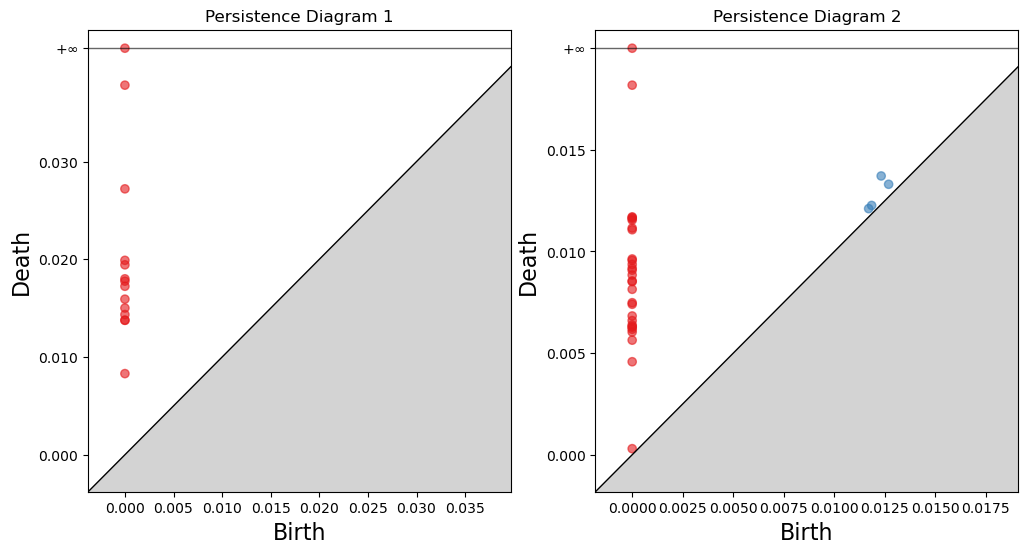

Bottleneck Distance: 0.01890953707296942


In [15]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

def convert_persistence_diagram(diagram):
    converted_diagram = []
    for point in diagram:
        dim, coords = point
        if np.isfinite(coords[1]):
            converted_diagram.append([coords[0], coords[1]])
    return np.array(converted_diagram)

def compute_persistence_diagrams(matrix1, matrix2):
    # Build Rips complexes from distance matrices
    rips_complex1 = gd.RipsComplex(distance_matrix=matrix1, max_edge_length=np.inf)
    rips_complex2 = gd.RipsComplex(distance_matrix=matrix2, max_edge_length=np.inf)

    # Compute the persistence diagrams for the two complexes
    simplex_tree1 = rips_complex1.create_simplex_tree(max_dimension=2)
    simplex_tree2 = rips_complex2.create_simplex_tree(max_dimension=2)
    persistence1 = simplex_tree1.persistence()
    persistence2 = simplex_tree2.persistence()

    # Convert persistence diagrams to the appropriate format
    persistence1_converted = convert_persistence_diagram(persistence1)
    persistence2_converted = convert_persistence_diagram(persistence2)

    # Compute the bottleneck distance between the two persistence diagrams
    bottleneck_distance = gd.bottleneck_distance(persistence1_converted, persistence2_converted)

    # Plot the persistence diagrams
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    gd.plot_persistence_diagram(persistence1, axes=plt.gca())
    plt.title('Persistence Diagram 1')
    plt.subplot(122)
    gd.plot_persistence_diagram(persistence2, axes=plt.gca())
    plt.title('Persistence Diagram 2')
    plt.show()

    return bottleneck_distance

# Example usage:
distance_matrix1 = js_distance_matrix_result
distance_matrix2 = js_distance_matrix_result_yiddish

bottleneck_dist = compute_persistence_diagrams(distance_matrix1, distance_matrix2)
print(f'Bottleneck Distance: {bottleneck_dist}')



In [16]:
import torch
from transformers import GPT2Tokenizer, GPT2Model

# Set up the GPT-2 model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Define the input text
input_text = "Quantum information theory is interesting."

# Tokenize the input text and convert it to a tensor
input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

# Get the model output with attention weights
outputs = model(input_ids)

# Extract the attention weights for a specific layer and head
layer = 1
head = 1
attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

# Compute the probability distributions P(X_i) for each word using softmax
prob_distributions = torch.softmax(torch.tensor(attention_weights), dim=1).numpy()

# Print the probability distributions for each word
for i, token_id in enumerate(input_ids[0]):
    token = tokenizer.decode(token_id.item())
    print(f"Token: {token}")
    print(f"Probability distribution P(X_{i}):")
    print(prob_distributions[i])


Token: Quant
Probability distribution P(X_0):
[0.31179103 0.11470152 0.11470152 0.11470152 0.11470152 0.11470152
 0.11470152]
Token: um
Probability distribution P(X_1):
[0.29946557 0.12166564 0.11577377 0.11577377 0.11577377 0.11577377
 0.11577377]
Token:  information
Probability distribution P(X_2):
[0.25716114 0.13954213 0.12749314 0.11895089 0.11895089 0.11895089
 0.11895089]
Token:  theory
Probability distribution P(X_3):
[0.25018683 0.13148431 0.130594   0.12915252 0.11952741 0.11952741
 0.11952741]
Token:  is
Probability distribution P(X_4):
[0.20149589 0.13769443 0.13769153 0.14631738 0.13243155 0.12218462
 0.12218462]
Token:  interesting
Probability distribution P(X_5):
[0.15868884 0.13489619 0.17339627 0.14234363 0.1353047  0.13227616
 0.12309412]
Token: .
Probability distribution P(X_6):
[0.18783028 0.130282   0.132098   0.1352153  0.12973906 0.15965696
 0.12517837]


In [17]:
# Compute the outer products of probability distributions
outer_products = []
for i in range(len(prob_distributions)):
    for j in range(i + 1, len(prob_distributions)):
        outer_product = prob_distributions[i][:, None] * prob_distributions[j][None, :]
        outer_products.append((i,j, outer_product))

# Print the outer products
for i, op in enumerate(outer_products):
    print(f"Outer product P(X_{op[0]}, X_{op[1]}):")
    print(op[2])


Outer product P(X_0, X_1):
[[0.09337068 0.03793425 0.03609722 0.03609722 0.03609722 0.03609722
  0.03609722]
 [0.03434915 0.01395523 0.01327943 0.01327943 0.01327943 0.01327943
  0.01327943]
 [0.03434915 0.01395523 0.01327943 0.01327943 0.01327943 0.01327943
  0.01327943]
 [0.03434915 0.01395523 0.01327943 0.01327943 0.01327943 0.01327943
  0.01327943]
 [0.03434915 0.01395523 0.01327943 0.01327943 0.01327943 0.01327943
  0.01327943]
 [0.03434915 0.01395523 0.01327943 0.01327943 0.01327943 0.01327943
  0.01327943]
 [0.03434915 0.01395523 0.01327943 0.01327943 0.01327943 0.01327943
  0.01327943]]
Outer product P(X_0, X_2):
[[0.08018054 0.04350799 0.03975122 0.03708782 0.03708782 0.03708782
  0.03708782]
 [0.02949677 0.01600569 0.01462366 0.01364385 0.01364385 0.01364385
  0.01364385]
 [0.02949677 0.01600569 0.01462366 0.01364385 0.01364385 0.01364385
  0.01364385]
 [0.02949677 0.01600569 0.01462366 0.01364385 0.01364385 0.01364385
  0.01364385]
 [0.02949677 0.01600569 0.01462366 0.013643

The following code is supposed to use the loss function 

\begin{align}
\mathcal{L}(\theta) &= D_{\text{KL}}(P(X_i,X_j) || \hat{P}(X_i,X_j)) + \lambda_1 D_{\text{KL}}(P(X_i) || \hat{P}(X_i)) + \lambda_2 D_{\text{KL}}(P(X_j) || \hat{P}(X_j))\\
&= \sum_{i, j} P_\theta(x_i, x_j) \log \frac{P_\theta(x_i, x_j)}{P_{\hat{\theta}}(x_i, x_j)} + \lambda_1 \sum_i P_\theta(x_i) \log \frac{P_\theta(x_i)}{\hat{P}(x_i)} + \lambda_2 \sum_j P_\theta(x_j) \log \frac{P_\theta(x_j)}{\hat{P}(x_j)}
\end{align}

to learn possible joint distributions for each pair of target marginal probabilities `prob_distributions[i]` and `prob_distributions[j]`, that is $P(X_i)$ $P(X_j)$. I fear this is either not the correct loss function, or the model is not using the correct loss function, or both. 

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Custom neural network architecture
class JointDistributionNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(JointDistributionNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size * 2, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=0) # Change dim to 0
        return x

# Define the input size, hidden size, and output size
input_size = len(prob_distributions[0])
hidden_size = 128
output_size = input_size * input_size

# Initialize the model, loss function, and optimizer
model = JointDistributionNetwork(input_size, hidden_size, output_size)
loss_function = nn.KLDivLoss(reduction='batchmean')
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 100
lambda1 = 0.1
lambda2 = 0.1

for epoch in range(num_epochs):
    total_loss = 0
    
    for i in range(len(prob_distributions)):
        for j in range(len(prob_distributions)):
            # Prepare the input
            input_distributions = torch.tensor(np.concatenate((prob_distributions[i], prob_distributions[j])), dtype=torch.float)
            
            # Forward pass
            predicted_joint_distribution = model(input_distributions).view(input_size, input_size)
            
            # Calculate the loss
            marginal_loss_i = loss_function(torch.log(predicted_joint_distribution.sum(dim=1)), torch.tensor(prob_distributions[i], dtype=torch.float))
            marginal_loss_j = loss_function(torch.log(predicted_joint_distribution.sum(dim=0)), torch.tensor(prob_distributions[j], dtype=torch.float))
            # This seems to be incorrect
            loss = lambda1 * marginal_loss_i + lambda2 * marginal_loss_j
            # It should look something more like this I think...
            # joint_loss = loss_function(torch.log(predicted_joint_distribution), target_joint_distribution)
            # loss = joint_loss + lambda1 * marginal_loss_i + lambda2 * marginal_loss_j

            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / (len(prob_distributions) * len(prob_distributions))}")

Epoch [1/100], Loss: 0.0006686462967285924
Epoch [2/100], Loss: 0.00030150216992538213
Epoch [3/100], Loss: 0.0003075633923465514
Epoch [4/100], Loss: 0.0002951818207330522
Epoch [5/100], Loss: 0.0002851475773593625
Epoch [6/100], Loss: 0.00027544541309016866
Epoch [7/100], Loss: 0.0002650951862366982
Epoch [8/100], Loss: 0.00025467249665501985
Epoch [9/100], Loss: 0.00024366844250575274
Epoch [10/100], Loss: 0.00023289637586142872
Epoch [11/100], Loss: 0.00022154814306137567
Epoch [12/100], Loss: 0.00020989661287767005
Epoch [13/100], Loss: 0.00019820454883524597
Epoch [14/100], Loss: 0.0001870479486662626
Epoch [15/100], Loss: 0.00017480110310149328
Epoch [16/100], Loss: 0.00016366158639839897
Epoch [17/100], Loss: 0.00015170384243419347
Epoch [18/100], Loss: 0.00014076390834816266
Epoch [19/100], Loss: 0.00012970326848257434
Epoch [20/100], Loss: 0.00011915388200132114
Epoch [21/100], Loss: 0.0001092971167369741
Epoch [22/100], Loss: 9.964299260900589e-05
Epoch [23/100], Loss: 9.041

Let's look at the predicted joint distributions to investigate further. 

In [19]:
# Set the model to evaluation mode
model.eval()

# Initialize a list to store the predicted joint distributions
predicted_joint_distributions = []

# Loop over all pairs of probability distributions
for i in range(len(prob_distributions)):
    predicted_joint_distributions_i = []
    
    for j in range(len(prob_distributions)):
        # Prepare the input
        input_distributions = torch.tensor(np.concatenate((prob_distributions[i], prob_distributions[j])), dtype=torch.float)
        
        # Forward pass to get the predicted joint distribution
        with torch.no_grad():
            predicted_joint_distribution = model(input_distributions).view(input_size, input_size).numpy()
        
        # Add the predicted joint distribution to the list
        predicted_joint_distributions_i.append(predicted_joint_distribution)
    
    predicted_joint_distributions.append(predicted_joint_distributions_i)

# Print the predicted joint distributions
for i, joint_distributions_i in enumerate(predicted_joint_distributions):
    for j, joint_distribution_ij in enumerate(joint_distributions_i):
        print(f"Predicted joint distribution P(X_{i}, X_{j}):")
        print(joint_distribution_ij)


Predicted joint distribution P(X_0, X_0):
[[0.0677008  0.0495601  0.03554812 0.03721889 0.04611714 0.04069406
  0.04746813]
 [0.04275821 0.01320553 0.01402841 0.01357093 0.01236129 0.01323845
  0.01202855]
 [0.03427503 0.01190057 0.01416088 0.01427509 0.01239635 0.01254744
  0.01241703]
 [0.03694157 0.01206452 0.01315818 0.0133869  0.01302114 0.01193118
  0.01236525]
 [0.04280072 0.01182557 0.01233572 0.01176679 0.00951874 0.01185171
  0.0104897 ]
 [0.03660949 0.0112335  0.01241352 0.01275257 0.01164794 0.01068624
  0.01152022]
 [0.04835802 0.01170531 0.01208218 0.01126239 0.00924415 0.01108553
  0.00847024]]
Predicted joint distribution P(X_0, X_1):
[[0.06560485 0.04999512 0.03610221 0.03777188 0.04639864 0.04106116
  0.04776298]
 [0.04083038 0.01352058 0.01448451 0.01391165 0.01267414 0.01357074
  0.01218878]
 [0.03304068 0.01209054 0.01448579 0.01453701 0.01255264 0.0127722
  0.01255632]
 [0.03546274 0.0122807  0.01350377 0.01369963 0.01323877 0.01217639
  0.01249799]
 [0.04095329 0

Now we would ideally like to use these predicted joint distributions $P(X_i, X_j)$ to calculate the inverse mutual information. This would define a second information theoretic distance metric on the distributions, allowing us to use persistent homology to study the distributions clustering behavior further. This can be done with entanglement and quantum mutual information as well assuming we have a meaningful way of entangling gates or some way of learning the entanglement structure of language. 

---
## Failed Attempts 

## Replacing Attention Distributions with State Vectors, or with Density Matrices

*Theme: There is no classical counterpart to entanglement*

*Question: Can we use this to study attention?*

### Amplitude Embedding

The amplitude embedding encoding a probability distribution into a quantum state vector for a qudit of dimension $d$ is:

$$
|\psi(X_i)\rangle = \sum_{x=0}^{d-1} \sqrt{p_{i,x}} |x\rangle
$$

### Density Matrices

A classical probability distribution $P(X_i)$ over a finite set of outcomes can be represented as a diagonal density matrix $\rho_{X_i}$. In this representation, the diagonal elements of the density matrix correspond to the probabilities of the respective outcomes, while the off-diagonal elements are zero.

Given a probability distribution $P(X_i) = (p_{i,1}, p_{i,2}, \ldots, p_{i,n})$, where $p_{i,x}$ denotes the probability of outcome $x$ and $\sum_{x=1}^n p_{i,x} = 1$, you can construct the density matrix $\rho_{X_i}$ as follows:
$$
\rho_{X_i} = \sum_{x=0}^{d-1} p_{i,x} |x\rangle \langle x|
=
\begin{pmatrix}
p_{i,1} & 0 & \cdots & 0 \\
0 & p_{i,2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & p_{i,n}
\end{pmatrix}$$

The density matrix $\rho_{X_i}$ is a positive semi-definite Hermitian matrix with unit trace, which is a requirement for a valid quantum state. In this way, you can represent a classical probability distribution as a diagonal density matrix, allowing you to work with classical information within a quantum framework. Note that this representation is limited to classical information, as it does not capture any quantum coherence or entanglement that may exist between different outcomes.

### von Neumann Entropy

The von Neumann entropy of a quantum state is defined as:

$$S(\rho) = -\text{Tr}(\rho \log_2 \rho)$$

For individual systems with density matrices $\rho_{X_i}$ and $\rho_{X_j}$, their von Neumann entropies are given by:

$$S(\rho_{X_i}) = -\text{Tr}(\rho_{X_i} \log_2 \rho_{X_i})$$
$$S(\rho_{X_j}) = -\text{Tr}(\rho_{X_j} \log_2 \rho_{X_j})$$

Since both $\rho_{X_i}$ and $\rho_{X_j}$ are diagonal density matrices, their von Neumann entropies are equivalent to their respective Shannon entropies:

$$S(\rho_{X_i}) = H(X_i)$$
$$S(\rho_{X_j}) = H(X_j)$$

Now, for the composite system described by the tensor product of the individual density matrices, $\rho_{X_i \otimes X_j} = \rho_{X_i} \otimes \rho_{X_j}$, the von Neumann entropy is:

$$S(\rho_{X_i \otimes X_j}) = -\text{Tr}(\rho_{X_i \otimes X_j} \log_2 \rho_{X_i \otimes X_j})$$

However, since the systems are uncorrelated (no entanglement), the von Neumann entropy of the composite system is equal to the sum of the von Neumann entropies of the individual systems:

$$S(\rho_{X_i \otimes X_j}) = S(\rho_{X_i}) + S(\rho_{X_j}) = H(X_i) + H(X_j)$$

In this case, the von Neumann entropy of the composite system is equivalent to the classical joint entropy of the independent probability distributions $H(X_i, X_j) = H(X_i) + H(X_j)$. This equivalence holds because we're considering uncorrelated classical systems represented by diagonal density matrices. For correlated systems or systems with quantum coherence or entanglement, the von Neumann entropy would not be equivalent to the classical joint entropy. 

### What Can We Do?

This, at present, just calculates the Shannon entropy as the von Neumann entropy. What could we do that is new to analyze attention? If we embed each distribution $P(X_i)$ as a density matrix (or state vector) we can entangle the different systems that we have prepared and compute the von Neumann entanglement entropy between each pair of subsystems corresponding to the distributions $P(X_i)$. This would also allow us to compute the quantum mutual information and form a distance metric from it given by 

$$QMI^{-1}(X_i, X_j) = 2 \ln 2 - QMI(X_i, X_j)$$ 

where 

$$QMI(X_i, X_j) = S(\rho_{X_i}) + S(\rho_{X_j}) - S(\rho_{X_i, X_j}).$$

### The Problem

Entangling can be done in many ways, and either entangling the subsystems in a principled way, or learning the correct entanglement structure is difficult and an ongoing process. Assume we have a way of entangling subsystems or learning the entanglement structure based in some text data. Then we will produce states similar to graph states. Graph states with fully connected graphs model entanglement between each pair of nodes (subsystems) in the graph describing the entaglement structure. This typically uses `CNOT` and `CZ` gates (such as in graph states obtained from surface codes), but our entanglement structure may be more nuanced, so we might have a perturbation/generalization of graph states that uses controlled-unitaries other than the usual `CNOT` and `CZ` gates. The following code creates two graph states (that are fully connected, that is, from a complete graph). One uses standard `CZ` gates to entangle each pair of subsystems, and the other uses controlled random unitaries. We get different von Neumann entanglement entropy and quantum mutul information structures from them. 

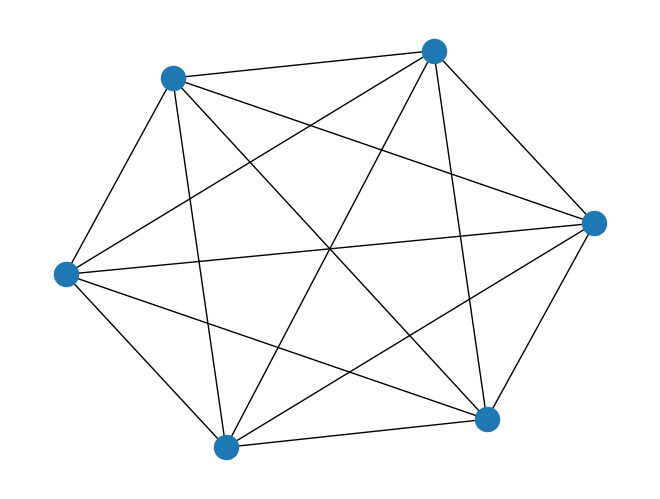

In [20]:
num_qubits = 6
# graph1 = nx.erdos_renyi_graph(num_qubits, 0.5)
graph1 = nx.complete_graph(num_qubits, create_using=None)
nx.draw(graph1)

In [21]:
import cirq
def generate_graph_state(graph):
    # Generate a random graph using NetworkX
    graph = graph
    num_qubits = len(graph.nodes)
    # Initialize a circuit with the specified number of qubits
    circuit = cirq.Circuit()
    qubits = [cirq.GridQubit(i, 0) for i in range(num_qubits)]

    # Apply H gates to all qubits
    circuit.append(cirq.H.on_each(*qubits))

    # Apply CZ gates to pairs of qubits based on the edges of the graph
    for edge in graph.edges:
        qubit1 = qubits[edge[0]]
        qubit2 = qubits[edge[1]]
        circuit.append(cirq.CZ(qubit1, qubit2))

    return circuit

In [22]:
GS1 = generate_graph_state(graph1)
GS1

┌──┐   ┌──┐   ┌───┐   ┌──┐   ┌──┐
(0, 0): ───H───@───@────@──────@──────@────────────────────────────
               │   │    │      │      │
(1, 0): ───H───@───┼────┼@─────┼@─────┼@──────@────────────────────
                   │    ││     ││     ││      │
(2, 0): ───H───────@────┼@─────┼┼─────┼┼@─────┼@─────@─────────────
                        │      ││     │││     ││     │
(3, 0): ───H────────────@──────┼@─────┼┼@─────┼┼─────┼@────@───────
                               │      ││      ││     ││    │
(4, 0): ───H───────────────────@──────┼@──────┼@─────┼@────┼───@───
                                      │       │      │     │   │
(5, 0): ───H──────────────────────────@───────@──────@─────@───@───
                       └──┘   └──┘   └───┘   └──┘   └──┘

In [23]:
import cirq
import numpy as np

def graph_state_circuit(graph):
    """Returns a graph state circuit on num_qubits qubits"""
    # Generate a random graph with num_qubits nodes
    graph = graph
    num_qubits = len(graph.nodes)

    # Initialize the circuit with the given qubits
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()

    # Apply Hadamard gates to all qubits
    circuit.append(cirq.H.on_each(qubits))

    # Apply random controlled unitary gates to each edge
    for edge in graph.edges():
        control_qubit, target_qubit = qubits[edge[0]], qubits[edge[1]]

        # Generate a random unitary matrix
        random_unitary = cirq.testing.random_unitary(2)

        # Apply the controlled random unitary gate to the circuit
        circuit.append(cirq.ControlledGate(cirq.MatrixGate(random_unitary)).on(control_qubit, target_qubit))

    # Define number of qubits in circuit
    circuit.num_qubits = len(circuit.all_qubits())

    return circuit

In [24]:
GS2 = graph_state_circuit(graph1)
GS2

┌──────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐   ┌───────────────────────────────────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐
0: ───H───@───────────────────────────────@────────────────────────────────@──────────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │                               │                                │                                                              │                                                              │
          ┌                           ┐   │                                │                                                              │                                                              │
1: ───H───│ 0.1  +0.953j  0.03 -0.284j│───┼────────────────────────────────┼────────────────────────────@─────────────────────────────────┼────────────────────────────@─────────────────────────────────┼────────────────────────────@──────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │-0.043+0.282j -0.338+0.897j│   │                                │                            │                                 │                            │                                 │                            │                                                              │
          └                           ┘   │                                │                            │                                 │                            │                                 │                            │                                                              │
                                          │                                │                            │                                 │                            │                                 │                            │                                                              │
                                          ┌                           ┐    │                            ┌                           ┐     │                            │                                 │                            │                                                              │
2: ───H───────────────────────────────────│-0.176+0.526j  0.195-0.809j│────┼────────────────────────────│-0.677-0.249j -0.641-0.263j│─────┼────────────────────────────┼─────────────────────────────────┼────────────────────────────┼────────────────────────────@─────────────────────────────────┼────────────────────────────@─────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                          │-0.82 -0.142j -0.553-0.048j│    │                            │ 0.231-0.653j -0.265+0.671j│     │                            │                                 │                            │                            │                                 │                            │                                 │
                                          └                           ┘    │                            └                           ┘     │                            │                                 │                            │                            │     

## Hopeful Frontiers

This is just a collection of somewhat connected questions I am interested in understanding:

- Use equivariance with respect to new groups other than permutation groups to understand groups symmetries in language. Perhaps these symmetries are somewhat "fuzzily localized" and context sensitive.
- Use graph grammars to understand attention?
- Hopefully we can use quantum graph neural networks similar to [this one](https://pennylane.ai/qml/demos/tutorial_qgrnn.html) to learn entanglement structures in text. What other quantum representations of language can we devise? What would happen if we replace real time with complex time as is done in [Wick rotation and the positivity of energy in quantum field theory](https://arxiv.org/abs/2105.10161)

For more on studying entanglement entropy and quantum mutual information of these perturbed/generalized graph states see [this repo](https://github.com/Amelie-Schreiber/persistent_homology_of_entanglement).

## Using Attention for Vision Tasks

The following code retrieves the weighted attention graph from a vision transformer for a specified `layer` and `head`. Once we have the attention graphs in hand, we can run the same persistent homology analysis of the Jensen-Shannon distance between pairs of probability distributions obtained from the token embeddings. Here, the image is segmented into patches and each patch is given an embedding vector. With the mbedding vectors we compute attention just as before. Given any two images, we can compute the bottleneck or Wasserstein distance between their persistence diagrams. 

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


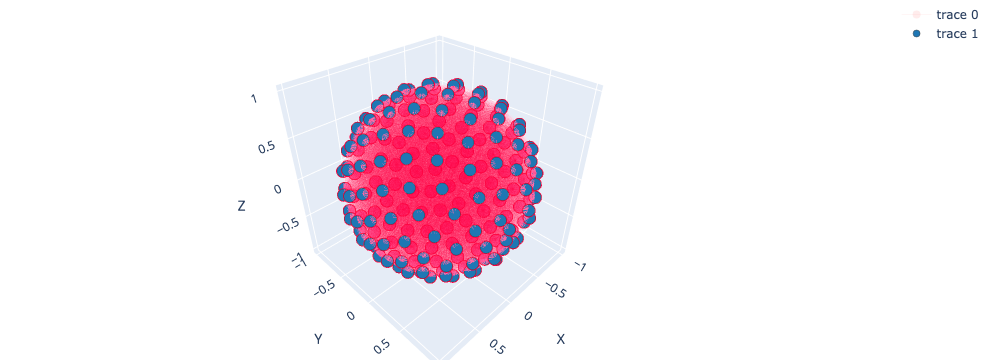

In [25]:
import torch
import torchvision.transforms as T
from PIL import Image
from transformers import ViTImageProcessor, ViTModel
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Load and preprocess the input image
image_path = "heart.jpg"
image = Image.open(image_path)
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
image_tensor = transform(image)  # Do not add batch dimension

# Load the pre-trained ViT model and image processor
model_name = "google/vit-base-patch16-224"
image_processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTModel.from_pretrained(model_name)

# Tokenize the image using the image processor
inputs = image_processor(images=[image_tensor], return_tensors="pt")

# Obtain the embeddings and attention weights for specific `layer` and `head` using the pre-trained ViT model
layer = 2
head = 3
outputs = model(**inputs, output_attentions=True)
attention_scores = outputs.attentions[layer][0][head].detach().cpu().numpy()

# Function to generate Fibonacci sphere points
def fibonacci_sphere_points(samples):
    points = []
    offset = 2 / samples
    increment = np.pi * (3 - np.sqrt(5))

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2)
        r = np.sqrt(1 - pow(y, 2))
        phi = ((i + 1) % samples) * increment

        x = np.cos(phi) * r
        z = np.sin(phi) * r
        points.append((x, y, z))

    return points

# Function to plot the attention graph
def plot_attention_graph(attention_scores):
    # Create graph object
    G = nx.from_numpy_array(attention_scores)

    # Set node positions
    pos = {i: coord for i, coord in enumerate(fibonacci_sphere_points(len(G.nodes())))}

    # Set edge trace
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z,
                          line=dict(width=0.5, color='rgba(255, 0, 5, 0.075)'))

    # Set node trace
    node_x = []
    node_y = []
    node_z = []
    node_text = []
    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        node_text.append(str(node))

    node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z,
                              mode='markers',
                              marker=dict(symbol='circle',
                                          size=7,
                                          color='#1f77b4',
                                          line=dict(width=0.5)),
                              text=node_text)

    # Set layout
    layout = go.Layout(scene=dict(xaxis=dict(title='X'),
                                   yaxis=dict(title='Y'),
                                   zaxis=dict(title='Z')), margin=dict(l=0, r=0, b=0, t=0))
    # Create figure and plot
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()

#Plot the attention graph
plot_attention_graph(attention_scores)